##Computer vision experiment no.5

###Swarnabh Gajbhiye

###Prn - 1032211392

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.io import imshow

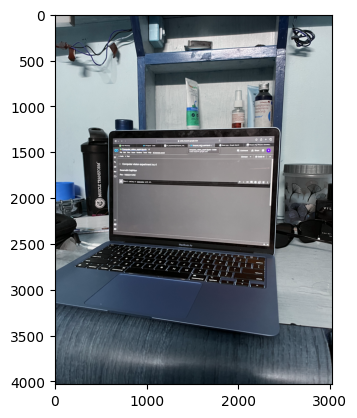

In [2]:
image1=cv2.imread('/content/IMG_4440.jpg')
plt.imshow(image1)

In [3]:
image1

array([[[242, 238, 237],
        [242, 238, 237],
        [242, 238, 237],
        ...,
        [ 64,  87,  95],
        [ 63,  86,  94],
        [ 62,  85,  93]],

       [[239, 235, 234],
        [239, 235, 234],
        [238, 234, 233],
        ...,
        [ 59,  82,  90],
        [ 58,  81,  89],
        [ 57,  80,  88]],

       [[234, 230, 229],
        [234, 230, 229],
        [233, 229, 228],
        ...,
        [ 56,  79,  87],
        [ 55,  78,  86],
        [ 53,  76,  84]],

       ...,

       [[ 47,  59,  69],
        [ 52,  64,  74],
        [ 53,  65,  75],
        ...,
        [135, 137, 147],
        [132, 134, 144],
        [131, 133, 143]],

       [[ 46,  58,  68],
        [ 50,  62,  72],
        [ 51,  63,  73],
        ...,
        [137, 139, 149],
        [134, 136, 146],
        [132, 134, 144]],

       [[ 45,  57,  67],
        [ 49,  61,  71],
        [ 49,  61,  71],
        ...,
        [139, 141, 151],
        [137, 139, 149],
        [136, 138, 148]]

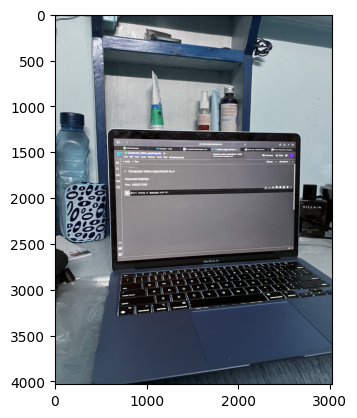

In [4]:
image2=cv2.imread('/content/IMG_4441.jpg')
plt.imshow(image2)

In [5]:
image2

array([[[ 52,  68,  75],
        [ 54,  70,  77],
        [ 57,  73,  80],
        ...,
        [106, 123, 132],
        [100, 117, 126],
        [ 97, 114, 123]],

       [[ 48,  64,  71],
        [ 51,  67,  74],
        [ 54,  70,  77],
        ...,
        [108, 125, 134],
        [106, 123, 132],
        [105, 122, 131]],

       [[ 47,  63,  70],
        [ 49,  65,  72],
        [ 53,  69,  76],
        ...,
        [107, 124, 133],
        [108, 125, 134],
        [110, 127, 136]],

       ...,

       [[ 97, 115, 122],
        [107, 125, 132],
        [108, 126, 133],
        ...,
        [ 89, 105, 117],
        [ 88, 104, 116],
        [ 89, 105, 117]],

       [[104, 122, 129],
        [111, 129, 136],
        [109, 127, 134],
        ...,
        [ 88, 104, 116],
        [ 87, 104, 113],
        [ 89, 106, 115]],

       [[115, 133, 140],
        [112, 130, 137],
        [105, 123, 130],
        ...,
        [ 87, 103, 115],
        [ 87, 104, 113],
        [ 90, 107, 116]]

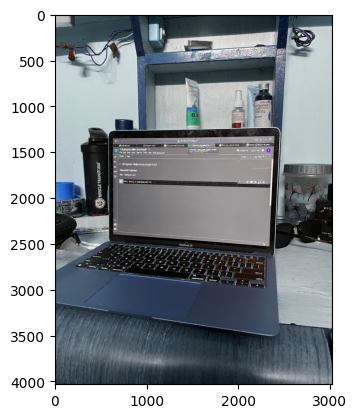

In [6]:
sift= cv2.xfeatures2d.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(image1,None)
img_1 = cv2.drawKeypoints(image1,keypoints_1,image1)
plt.imshow(img_1)

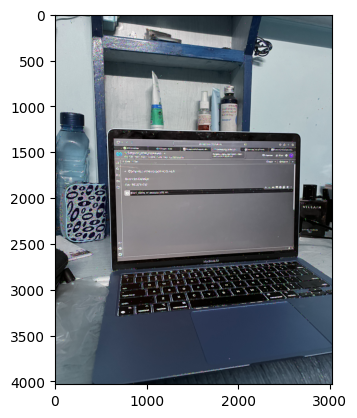

In [7]:
keypoints_2, descriptors_2 = sift.detectAndCompute(image2,None)
img_2 = cv2.drawKeypoints(image2,keypoints_2,image2)
plt.imshow(img_2)

In [8]:
len(keypoints_1),len(keypoints_2)

(13578, 17204)

In [9]:
#Feature matching
bf=cv2.BFMatcher(cv2.NORM_L1,crossCheck=True)
matches=bf.match(descriptors_1,descriptors_2)
matches=sorted(matches, key= lambda x:x.distance)

In [10]:
len(matches)

3447

In [11]:
img3=cv2.drawMatches(img_1,keypoints_1,img_2,keypoints_2,matches[:100],img_2,flags=2)

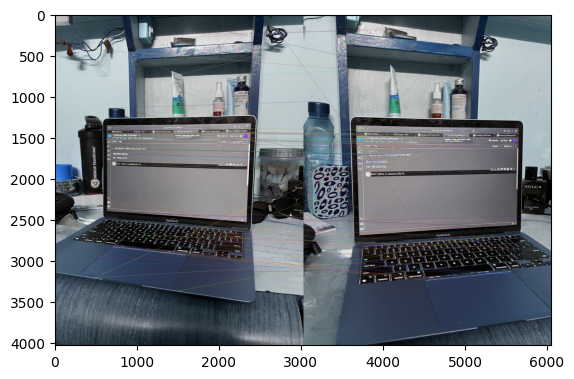

In [12]:
plt.imshow(img3)

In [13]:
#Extract matches keypoints
src_pts=np.float32([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
dst_pts=np.float32([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

In [14]:
#prespective transformation
M, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)

In [15]:
M

array([[ 1.80774603e+00,  4.03367619e-02, -4.68692840e+02],
       [ 3.23318572e-01,  1.45724058e+00, -6.42976869e+02],
       [ 2.02867164e-04,  2.68951136e-06,  1.00000000e+00]])

In [16]:
#apply prespective transformation
newImage1 = cv2.warpPerspective(img_1, M, dsize=(img_2.shape[1], img_2.shape[0]))

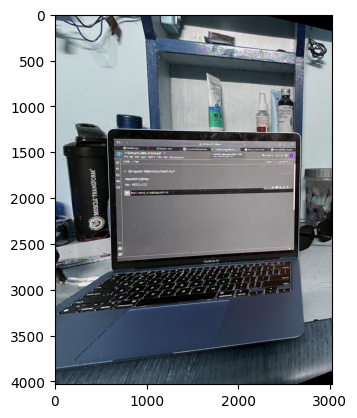

In [17]:
plt.imshow(newImage1)

Text(0.5, 1.0, 'Registered')

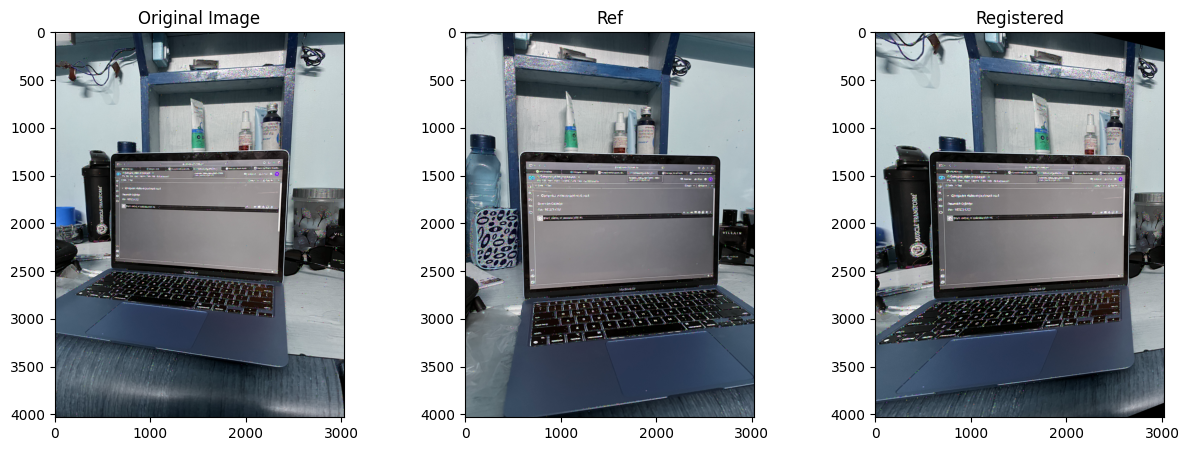

In [18]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(image2, cmap='gray')
plt.title('Ref')

plt.subplot(1, 3, 3)
plt.imshow(newImage1)
plt.title('Registered')
